In [1]:
#load dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load in the collected data
df2006 = pd.read_json('dataframes/df2006.json')
df2007 = pd.read_json('dataframes/df2007.json')
df2008 = pd.read_json('dataframes/df2008.json')
df2009 = pd.read_json('dataframes/df2009.json')

In [3]:
#combine the data into one dataframe, check for data types and null values
df = df2006.append(df2007.append(df2008.append(df2009)))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14770 entries, c1e4o to c0i10ti
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   score             14770 non-null  int64 
 1   controversiality  14770 non-null  int64 
 2   subreddit         14770 non-null  object
 3   body              14770 non-null  object
 4   month             14770 non-null  int64 
 5   year              14770 non-null  int64 
 6   original_size     14770 non-null  int64 
 7   PS                14770 non-null  bool  
 8   XBOX              14770 non-null  bool  
dtypes: bool(2), int64(5), object(2)
memory usage: 952.0+ KB


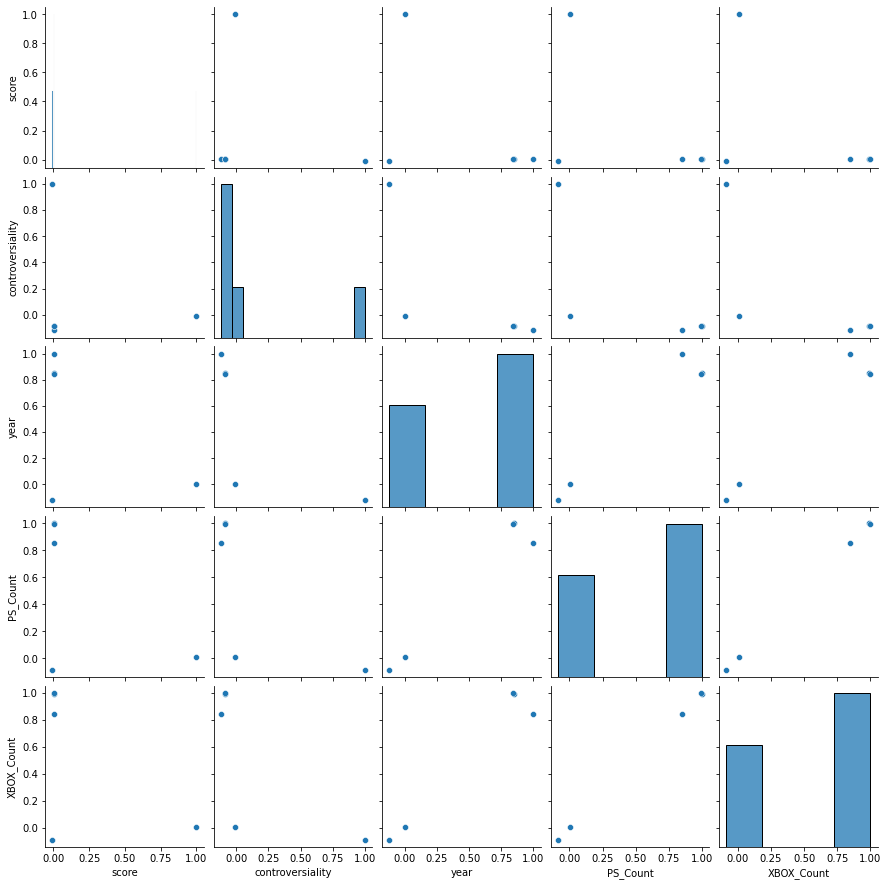

In [4]:
#First let's take a look at the correlation of numeric, boolean, and categorical data.
#The body column is the unique message of each post, and will be explored at a later point.
#In addition, original_size is just the number of posts in that year/month combination and
#will not be useful in looking at correlations.
df['PS_Count'] = df['PS'].cumsum() * 100 / df['original_size']
df['XBOX_Count'] = df['XBOX'].cumsum() * 100 / df['original_size']

corr_df = df[['score', 'controversiality', 'subreddit', 'year', 'PS_Count', 'XBOX_Count']]
sns.pairplot(corr_df.corr())
plt.show()

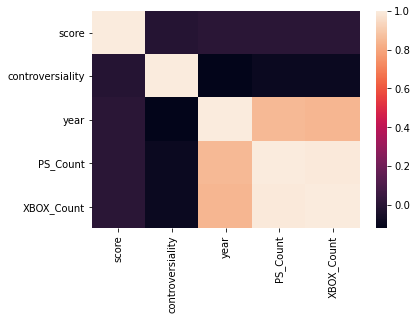

In [5]:
#Not a ton of useful information here.  PS_Count and XBOX_Count are both positively correlated
#with year and each other, as both useage of Reddit since its inception in 2005 and talk of the 
#consoles have increased over the years.  
#What is interesting about that though is that the two count columns are percents of 
#overall Reddit comments, meaning PS and XBOX have become increasing popular topics of conversation.

#As one might expect, controversiality and score are negatively correlated.
#Looking at the heatmap though, they're negatively correlated with everything else as well.
#This is because controversiality only has two values: 0 and 1, the former appearing over 14k times
#while the latter only shows up 15 times, all of which were in 2006 and 2007.
#Score, meanwhile has a wide variance, with about 11k/14.5k entries being between 0 and 4 but overall
#ranging from -45 to 398.
sns.heatmap(corr_df.corr())
plt.show()

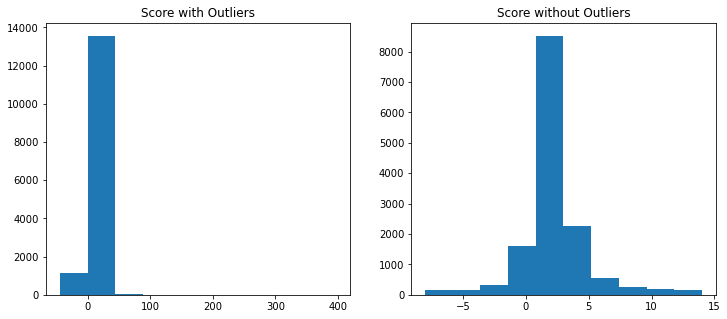

In [6]:
#Just to visualize how many outliers score has.
figs, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].hist(df['score'])

m = df['score'].mean()
std = df['score'].std()
axs[1].hist(df['score'][(df['score'] >= (m-std)) & (df['score'] <= (m+std))])

axs[0].set_title('Score with Outliers')
axs[1].set_title('Score without Outliers')
plt.show()

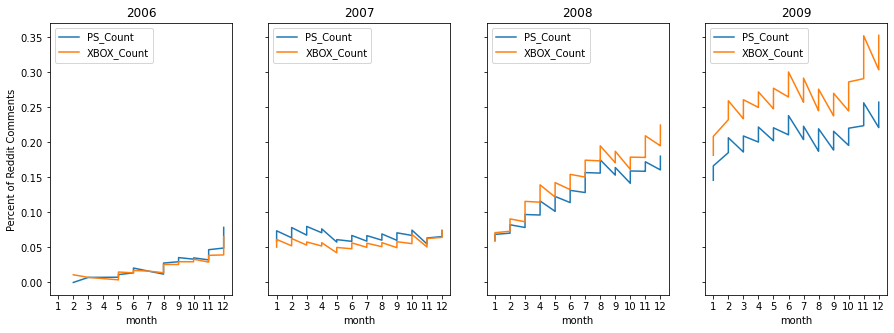

In [7]:
#plotting Counts of XBOX and PS against time
#I only have year/month data for time, so I'm splitting by year, rather than making a time series

figs, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(15,5))

_ = df[df['year']==2006].plot(x='month', y=['PS_Count', 'XBOX_Count'], ax=axs[0])
_ = df[df['year']==2007].plot(x='month', y=['PS_Count', 'XBOX_Count'], ax=axs[1])
_ = df[df['year']==2008].plot(x='month', y=['PS_Count', 'XBOX_Count'], ax=axs[2])
_ = df[df['year']==2009].plot(x='month', y=['PS_Count', 'XBOX_Count'], ax=axs[3])


axs[0].set_title('2006')
axs[1].set_title('2007')
axs[2].set_title('2008')
axs[3].set_title('2009')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
figs.text(0.09, 0.5, 'Percent of Reddit Comments', ha='center', va='center', rotation='vertical')
axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')
axs[3].legend(loc='upper left')
plt.show()

In [8]:
#Plots above are separated by year of counts per month (hence the step function appearance).
#Both sets scale exponentially due to more frequent use of Reddit as time goes on, 
#hence the percentage of mentions rather than count.
#It looks like PS initially had more mentions, but XBOX eventually took over in early 2008.
#Percent of Reddit Comments are all less than 1% for clarification.

In [9]:
#plotting Counts by Subreddit

#create a filtering mask to only show subreddits that have more than 10 mentions apiece to avoid an oversized graph
subreddit_mask = df['subreddit'].value_counts() > 10
subreddit_mask.replace(False, np.nan, inplace=True)
subreddit_mask.dropna(inplace=True)
subreddit_df = df[df['subreddit'].isin(subreddit_mask.index)]

subreddit_df['PS_Subreddit_Count'] = subreddit_df['subreddit']
subreddit_df['XBOX_Subreddit_Count'] = subreddit_df['subreddit']
for subreddit in subreddit_mask.index:
    base_df = subreddit_df[subreddit_df['subreddit']==subreddit]
    ps_sub = base_df[base_df['PS']==True]
    xbox_sub = base_df[base_df['XBOX']==True]
    ps_count = ps_sub['PS'].count()
    xbox_count = xbox_sub['XBOX'].count()

    subreddit_df['PS_Subreddit_Count'].replace(subreddit, str(ps_count), inplace=True)
    subreddit_df['XBOX_Subreddit_Count'].replace(subreddit, str(xbox_count), inplace=True)
    
subreddit_df['PS_Subreddit_Count'] = subreddit_df['PS_Subreddit_Count'].astype(int)
subreddit_df['XBOX_Subreddit_Count'] = subreddit_df['XBOX_Subreddit_Count'].astype(int)

<ipython-input-9-6190ae284e5f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_df['PS_Subreddit_Count'] = subreddit_df['subreddit']
<ipython-input-9-6190ae284e5f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_df['XBOX_Subreddit_Count'] = subreddit_df['subreddit']
C:\Users\rlybb\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

<ipython-input-10-281cf78354da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_df.sort_values(by='XBOX_Subreddit_Count', inplace=True, ascending=False)


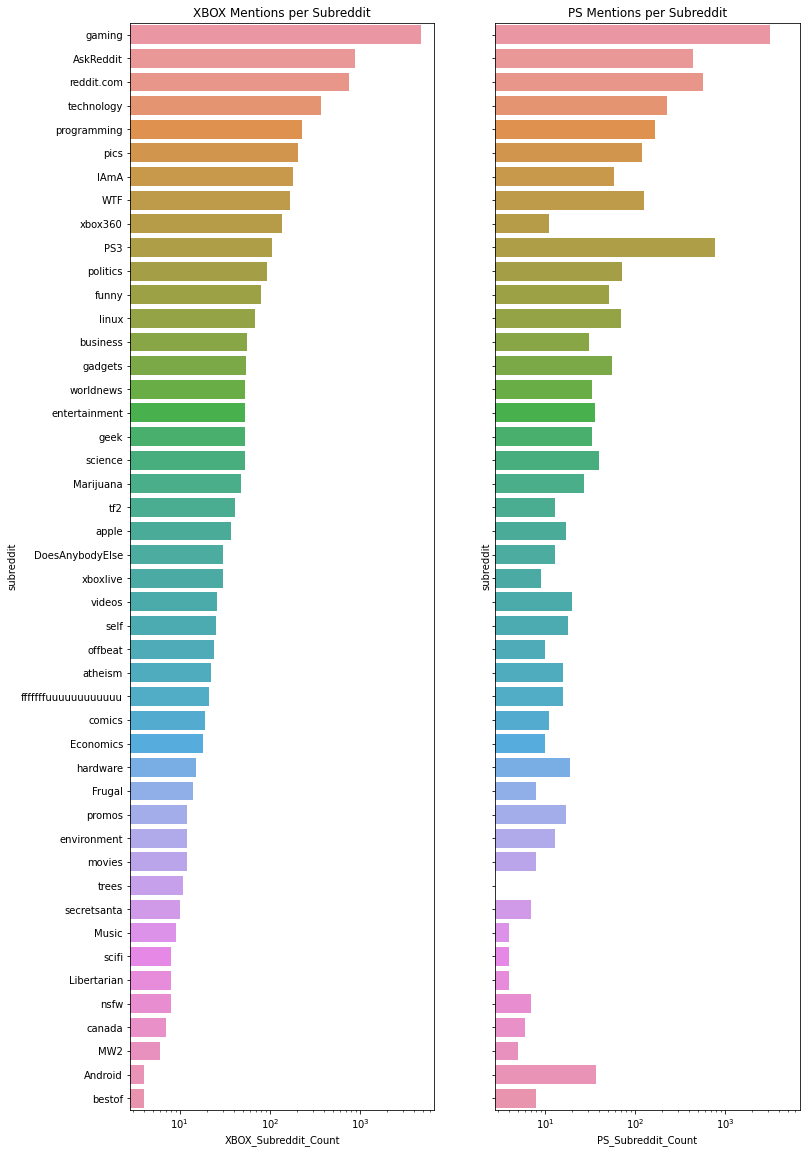

In [10]:
subreddit_df.sort_values(by='XBOX_Subreddit_Count', inplace=True, ascending=False)

figs, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 20))
sns.barplot(x='XBOX_Subreddit_Count', y='subreddit', data=subreddit_df, ax=axs[0])
axs[0].set_title('XBOX Mentions per Subreddit')
axs[0].set_xscale('log')

sns.barplot(x='PS_Subreddit_Count', y='subreddit', data=subreddit_df, ax=axs[1])
axs[1].set_title('PS Mentions per Subreddit')
plt.show()

In [11]:
#The above barplots separate number of mentions by subreddit.  
#Unsurprisingly, Gaming is the most popular subreddit for both XBOX and PS, 
#followed by PS3 for PS, askreddit and reddit.com, technology, and programming.
#note that reddit.com is a placeholder for posts before subreddits were created in 2008.
#Once again, the data is shown on a logarithmic scale due to the exponential behavior of posts on Reddit.

In [22]:
#As the body column is filled with entire paragraphs,
#I'll be needing to get a bit creative with EDA.
#In this case, I'll be measuring overall console sentiment and make a word cloud
#Using textblob because it has a built-in sentiment analysis that I can use to train my data later on.
from textblob import TextBlob

def sentiment_analysis(paragraph):
    body_text = TextBlob(paragraph)
    return(body_text.sentiment[0])

def paragraph_cleanse(paragraph):
    #split contractions
    #spell out numbers
    #    figure out how to check if something is a number before using num2word on it
    #lowercase everything
    paragraph = paragraph.lower()
    #remove punctuation and excess spacing
    for char in ['`', '~', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '=', '+', '[', '{', ']', '}', '|',
                 '\\', ':', ';', '"', "'", ',', '<', '.', '>', '/', '?']:
        paragraph = paragraph.replace(char, ' ')
        paragraph = paragraph.replace('  ', ' ')
    return(paragraph)
        
df['sentiment'] = df['body'].apply(sentiment_analysis)
df['body'] = df['body'].apply(paragraph_cleanse)

print(df['sentiment'].head())
print(df['body'].head())

c1e4o   -0.055082
c3kh6    0.000000
c5iqp    0.235417
c5vr3    0.110119
c5zhh    0.418750
Name: sentiment, dtype: float64
c1e4o    the article raises concerns that a single spee...
c3kh6    linkjack here http www macworld com 2005 09 fe...
c5iqp    do you feel that now that we have discovered t...
c5vr3     gt what makes nintendo wii special and differ...
c5zhh    i don t know about you fags but i ve never bee...
Name: body, dtype: object


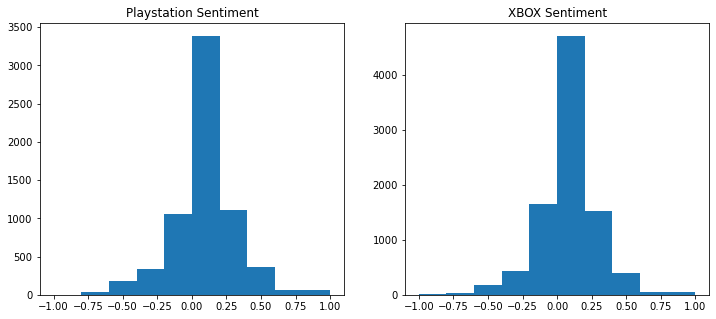

In [23]:
figs, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(12, 5))
axs[0].hist(df['sentiment'][df['PS']==True])
axs[1].hist(df['sentiment'][df['XBOX']==True])

axs[0].set_title('Playstation Sentiment')
axs[1].set_title('XBOX Sentiment')
plt.show()

In [ ]:
#It looks like the ratio of each console's sentiment is roughly the same.
#Sentiment is measured on a scale of -1 to 1.